In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlt
import cv2
from scipy import signal

---
### 176 - Blurring, Edge Detection and Image Sharpening in Python
---

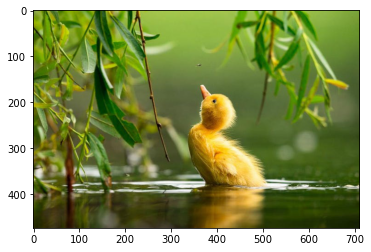

In [11]:
birdImg = r'C:\Users\Gadhiya\OneDrive\Desktop\ComputerVision\birdImg.jpg'
birdImg = plt.imread(birdImg)
plt.imshow(birdImg)

In [13]:
imGray = cv2.cvtColor(birdImg, cv2.COLOR_RGB2GRAY)

In [14]:
smoothingMask = np.ones((15,15))/225

In [19]:
imBlur = signal.convolve2d(imGray, smoothingMask, boundary='symm', mode='same')

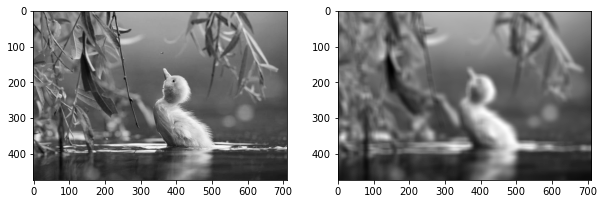

In [20]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,15))
ax1.imshow(imGray, cmap='gray')
ax2.imshow(imBlur, cmap='gray')

In [21]:
xMask = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
yMask = xMask.T.copy()

In [22]:
fx = signal.convolve2d(imGray, xMask, boundary='symm', mode='same')
fy = signal.convolve2d(imGray, yMask, boundary='symm', mode='same')

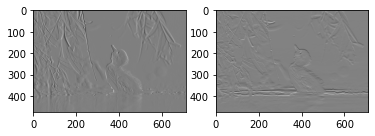

In [28]:
plt.subplot(121)
plt.imshow(fx, cmap='gray')
plt.subplot(122)
plt.imshow(fy, cmap='gray')
plt.show()

In [25]:
# gradientMagnitude = Gm
Gm = (fx**2+fy**2)**0.5

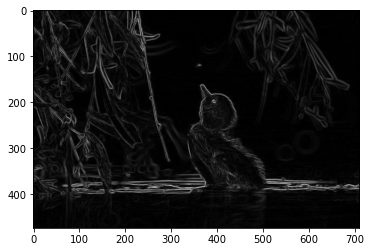

In [26]:
plt.imshow(Gm, cmap='gray')

In [54]:
th = Gm.max()-10*Gm.std()
th

91.88035015862965

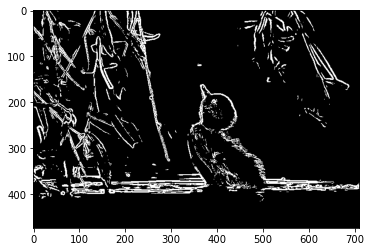

In [55]:
plt.imshow(Gm>th, cmap='gray')

In [77]:
imSharp = imBlur + 0.4*Gm

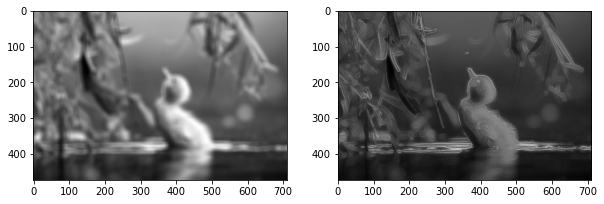

In [78]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,15))
ax1.imshow(imBlur, cmap='gray')
ax2.imshow(imSharp, cmap='gray')